# Guía 2 ejercicio 20

## Samantha Kucher

# a)

Un experimento aleatorio es aquel que si lo repito bajo las mismas condiciones iniciales, da distinto. Un experimento de Bernoulli es un experimento aleatorio que tiene dos posibles resultados: éxito o fracaso.   
   
El objetivo de este programa es simular un experimento de Bernoulli, con una dada cantidad de intentos y cierta probabilidad de tener éxito en cada intento.

In [22]:
import numpy as np
import math as m
import random as rd
from scipy.stats import binom, poisson
from matplotlib import pyplot as plt
from datetime import datetime
rd.seed(datetime.now())
%matplotlib inline

Genero M números aleatorios con distribución uniforme en [0,1). Por cada número, si es menor a una probabilidad prefijada, significa que tuve un éxito (si no, un fracaso). Al final del experimento, cuento la cantidad de éxitos y de fracasos obtenidos.

In [23]:
exitos_vector=[] #vectores para guardar la cantidad de éxitos y fracasos de cada experimento
fracasos_vector=[]

In [24]:
def expbernoulli_itema(prob,M): #M = cantidad de intentos = cantidad de numeros aleatorios por experimento
    exitos = 0
    fracasos = 0
    for n in range(0,M):
        num = rd.random()
        if num<prob:
            exitos = exitos+1 #cantidad de numeros abajo de prob
        else:
            fracasos = fracasos+1 #cantidad de numeros arriba de prob
    exitos_vector.append(exitos) #voy juntando la cantidad de numeros que salen abajo de p en cada experimento
    fracasos_vector.append(fracasos)
    return exitos_vector

Puedo repetir el experimento T veces. Los resultados de cada repetición los guardo en `exitos_vector` y `fracasos_vector`. Por ejemplo, T=1000, obtengo lo siguiente:

In [25]:
T =1000 #repeticiones del experimento
for i in range(0,T):    
    a = expbernoulli_itema(0.6,100)

print('En promedio, se obtuvieron {} éxitos y {} fracasos.').format(round(np.mean(exitos_vector),0), round(np.mean(fracasos_vector)),0)

En promedio, se obtuvieron 60.0 éxitos y 40.0 fracasos.


Se observa claramente que la cantidad de éxitos obtenida es `M*prob`. Es decir, la probabilidad de que el generador entregue un número en [0,`prob`) es `prob` (por lo tanto, la probabilidad de que entregue uno en [`prob`,1) es 1-`prob`).

In [26]:
exitos_vector=[] #vacio los vectores
fracasos_vector=[]

Defino otra función que no cuente los fracasos, porque no los vamos a necesitar.

In [27]:
def expbernoulli(prob,M): #M = cantidad de intentos = cantidad de numeros aleatorios por experimento
    exitos = 0
    for n in range(0,M):
        num = rd.random()
        if num<prob:
            exitos = exitos+1 #cantidad de numeros abajo de prob
    exitos_vector.append(exitos) #voy juntando la cantidad de numeros que salen abajo de p en cada experimento
    return exitos_vector

# b)

Ahora inciden 15 fotones sobre un detector con eficiencia 0.75. Es decir, `M=15` y `prob=0.75`, y el experimento se repite 1000 veces.

In [28]:
T = 1000 #repeticiones del experimento
for i in range(0,T):    
    b = expbernoulli(0.75,15)

Como se realizó un experimento de Bernoulli en el cual la variable aleatoria es la cantidad de éxitos y la probabilidad de tener éxito es constante, la distribución que corresponde a esta variable aleatoria es la binomial.

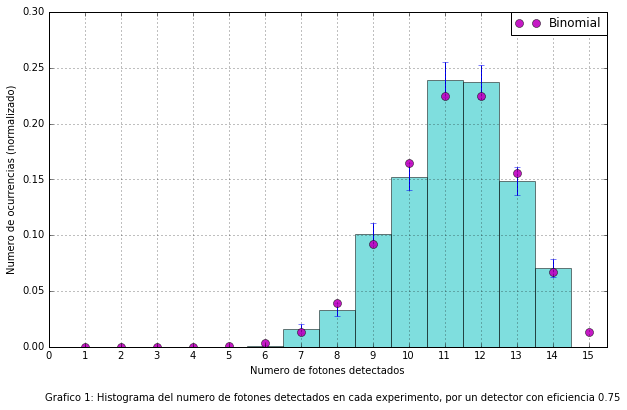

In [29]:
puntosb = np.arange(1,16,1) #puntos para graficar la distribución
binesb = np.arange(0.5,15.5)
numerob, binsb = np.histogram(b, bins = binesb) 
errorb = np.sqrt(numerob*(1-numerob/np.sum(numerob))) / (np.diff(binsb)* np.sum(numerob)) #error binomial (normalizado)
numerob = numerob / (np.diff(binsb) * np.sum(numerob)) #Normalizo a 1

fig = plt.figure(figsize=(10,6))
plt.bar(binsb[:-1], numerob, width = np.diff(binsb), yerr = errorb, ecolor="b", color='c', alpha=0.5)
plt.plot(puntosb,binom.pmf(puntosb, 15,0.75), 'mo', ms=8, label='Binomial', alpha=0.9)
plt.legend(loc=1, borderaxespad=0.)
plt.xlim([0,15.5])
plt.xticks(range(0,16))
plt.xlabel('Numero de fotones detectados')
plt.ylabel('Numero de ocurrencias (normalizado)')
plt.figtext(.12, .0001, 'Grafico 1: Histograma del numero de fotones detectados en cada experimento, por un detector con eficiencia 0.75')
plt.grid()
plt.show()

In [63]:
exitos_vector=[] #vacio el vector

# c)

Una fuente emite fotones con una intensidad media $I=15 \ \text{fot} \ s^{-1}$. Con el objetivo de simular la emisión de fotones durante un $\Delta t = 1 \ \text{s}$, se dividió este tiempo en 1000 intervalos iguales $dt$.  
   
La variable aleatoria "cantidad de fotones emitidos en $\Delta t = 1 \ s$ " tiene distribución poissoniana porque, en cada $dt$, la probabilidad de emitir un fotón es muy baja ($p=\frac{15}{1000}$) y la cantidad de intervalos $dt$ en los cuales dividí $\Delta t$ es muy grande ($n=1000$), tal que $n.p$ es finito ($I=15$).   
   
Considero la variable aleatoria "cantidad de fotones emitidos en un tiempo t", que tiene la siguiente distribución: 
<center>
$P(k, \mu = It) = e^{-It} \frac{(It)^k}{k!}$
</center></h1>
Para calcular la probabilidad de emitir un fotón en $dt$ tomo $t=dt$ y $k=1$:
<center>
$P(k=1, \mu = \frac{15}{1000}) = \frac{15}{1000}e^{-\frac{15}{1000}} \approx \frac{15}{1000} \qquad \Big( e^{-\frac{15}{1000}}\approx 1 \Big)$
</center></h1>   

   
Considero ahora $dt' = \frac{1}{2000} \ s$. De manera análoga, la probabilidad de emitir un fotón en $dt'$ es $\frac{15}{2000}$. La probabilidad de emitir un fotón en $dt'$ y otro fotón en el $dt'$ siguiente es el producto de ambas, porque son independientes (que un fotón haya sido emitido en un $dt'$ no modifica la emisión de otro en el $dt'$ siguiente). Entonces, la probabilidad de emitir dos fotones consecutivos es $(\frac{15}{2000})^2 = 5.625 \times 10^{-5}$. Esto es la probabilidad de emitir dos fotones en un $dt$ ($2dt'=dt$), y como es tres órdenes de magnitud más chica que la probabilidad de emitir un fotón en un $dt$, la vamos a despreciar.   

   
Dado que despreciamos la probabilidad de emitir más de un fotón en un intervalo, en un $dt$ pueden pasar dos cosas: que la fuente emita (éxito) o que no emita (fracaso). Por eso es válido usar un programa que simula experimentos de Bernoulli.

In [64]:
T = 1000 #repeticiones del experimento
for i in range(0,T):    
    c = expbernoulli(15.00/1000.00,1000)

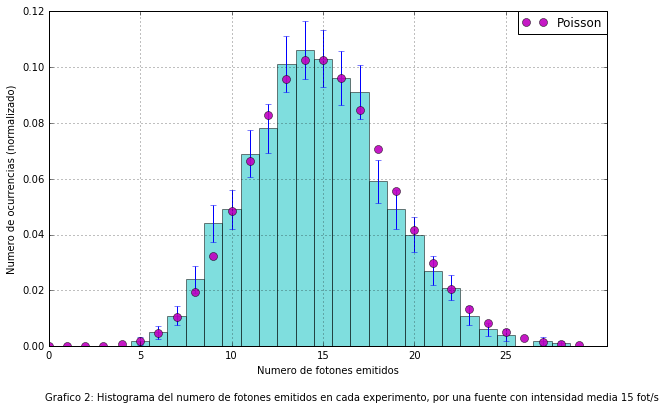

In [65]:
puntosc = np.arange(0,30) #puntos para graficar la distribución
binesc = np.arange(0.5,30.5)
numeroc, binsc = np.histogram(c, bins = binesc) 
errorc = np.sqrt(numeroc) / (np.diff(binsc)* np.sum(numeroc)) #error poissoniano
numeroc = numeroc / (np.diff(binsc) * np.sum(numeroc)) #Normalizo a 1

fig = plt.figure(figsize=(10,6))
plt.bar(binsc[:-1], numeroc, width = np.diff(binsc), yerr = errorc, ecolor="b", color='c', alpha=0.5)
plt.plot(puntosc,poisson.pmf(puntosc, 15), 'mo', ms=8, label='Poisson', alpha=0.9)
plt.legend(loc=1, borderaxespad=0.)
plt.xlim([0,30.5])
plt.xticks(range(0,30,5))
plt.xlabel('Numero de fotones emitidos')
plt.ylabel('Numero de ocurrencias (normalizado)')
#plt.title('Histograma')
plt.figtext(.12, .001, 'Grafico 2: Histograma del numero de fotones emitidos en cada experimento, por una fuente con intensidad media 15 fot/s')
plt.grid()
plt.show()

In [66]:
exitos_vector=[] #vacio el vector

# d)

Los fotones emitidos en el ítem c pasan por el detector del ítem b. La variable aleatoria cantidad de fotones emitidos tiene distribución poissoniana, mientras que la variable aleatoria cantidad de fotones detectados tiene distribución binomial. Esto significa que la distribución de la variable aleatoria "cantidad de fotones detectados" es la composición de una binomial con probabilidad $\epsilon$ con una poissoniana de constante $Idt$. De acuerdo con el ejercicio 19)b) de esta guía, esta composición da como resultado una distribución poissoniana de constante $\epsilon I dt$.  
   
Para simular este proceso, genero números aleatorios con distribución uniforme en [0,1) y cuento cuántos son emitidos. Si el número  es menor que $\frac{15}{1000}$, entonces es emitido. Como el detector subtiende un ángulo sólido de $4\pi$, todos los fotones emitidos llegan a él. Entonces, para determinar cuántos fotones son detectados, tomo tantos números aleatorios como fotones hayan llegado, y cuento cuántos son menores que $0.75$.   
   
Realizar este procedimiento es lo mismo que generar un número aleatorio, fijarme si es menor que $\frac{15}{1000}$, y si esto ocurre, generar otro y fijarme si es menor que $0.75$, dado que de esta manera esoy generando tantos segundos números aleatorios como primeros hayan pasado la primera selección, lo cual era el objetivo del programa.   
   
Obs.: No uso el mismo número para realizar ambas selecciones porque eso sería fijarme si `num`$<min${$\epsilon, Idt$}, y de esta manera todos los que pasen la primera selección pasarían la segunda, ya que $\frac{15}{1000}<0.75$, entonces eso representaría solamente la emisión.

In [40]:
det_vector = []

def fotdetectados(p_emitir, p_detectar,M): #M = cantidad de intentos = cantidad de numeros aleatorios por experimento
    det = 0
    for n in range(0,M):
        num1 = rd.random()
        if num1<p_emitir: #si es emitido
            num2 = rd.random()
            if num2<p_detectar: #si es detectado
                det = det+1 #¡exito!
    det_vector.append(det)
    return det_vector

In [41]:
T = 1000
for i in range(0,T):
    d = fotdetectados(15.00/1000.00,0.75,1000)

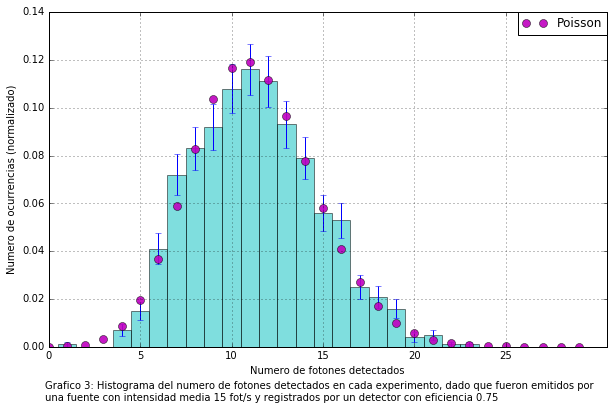

In [42]:
puntosd = np.arange(0,30) #puntos para graficar la distribución
binesd = np.arange(0.5,30.5)
numerod, binsd = np.histogram(d, bins = binesd) 
errord = np.sqrt(numerod) / (np.diff(binsd)* np.sum(numerod)) #error poissoniano
numerod = numerod / (np.diff(binsd) * np.sum(numerod)) #Normalizo a 1

fig = plt.figure(figsize=(10,6))
plt.bar(binsd[:-1], numerod, width = np.diff(binsd), yerr = errord, ecolor="b", color='c', alpha=0.5)
plt.plot(puntosd,poisson.pmf(puntosd, 15*0.75), 'mo', ms=8, label='Poisson', alpha=0.9)
plt.legend(loc=1, borderaxespad=0.)
plt.xlim([0,30.5])
plt.xticks(range(0,30,5))
plt.xlabel('Numero de fotones detectados')
plt.ylabel('Numero de ocurrencias (normalizado)')
#plt.title('Histograma')
plt.figtext(.12, .0001, 'Grafico 3: Histograma del numero de fotones detectados en cada experimento, dado que fueron emitidos por \nuna fuente con intensidad media 15 fot/s y registrados por un detector con eficiencia 0.75')
plt.grid()
plt.show()

# e)

In [43]:
T = 1000 #repeticiones del experimento
for i in range(0,T):    
    e = expbernoulli(0.75*(15.00/1000.00),1000)

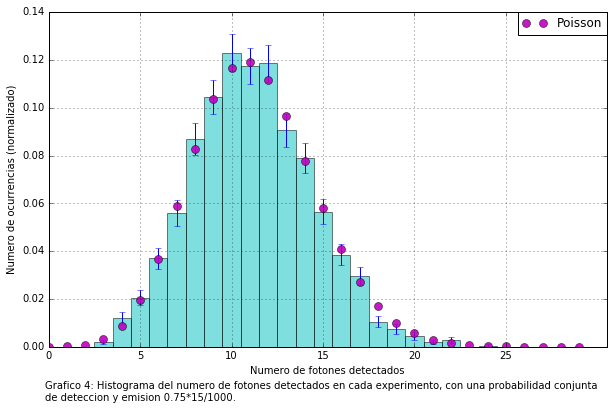

In [44]:
puntose = np.arange(0,30) #puntos para graficar la distribución
binese = np.arange(0.5,30.5)
numeroe, binse = np.histogram(e, bins = binese) 
errore = np.sqrt(numeroe) / (np.diff(binse)* np.sum(numeroe)) #error poissoniano
numeroe = numeroe / (np.diff(binse) * np.sum(numeroe)) #Normalizo a 1

fig = plt.figure(figsize=(10,6))
plt.bar(binse[:-1], numeroe, width = np.diff(binse), yerr = errore, ecolor="b", color='c', alpha=0.5)
plt.plot(puntose,poisson.pmf(puntose, 15*0.75), 'mo', ms=8, label='Poisson', alpha=0.9)
plt.legend(loc=1, borderaxespad=0.)
plt.xlim([0,30.5])
plt.xticks(range(0,30,5))
plt.xlabel('Numero de fotones detectados')
plt.ylabel('Numero de ocurrencias (normalizado)')
#plt.title('Histograma')
plt.figtext(.12, .0001, 'Grafico 4: Histograma del numero de fotones detectados en cada experimento, con una probabilidad conjunta \nde deteccion y emision 0.75*15/1000.')
plt.grid()
plt.show()

Con el fin de comparar los gráficos (3) y (4), superpuse ambos histogramas, como se observa en el gráfico (5). 

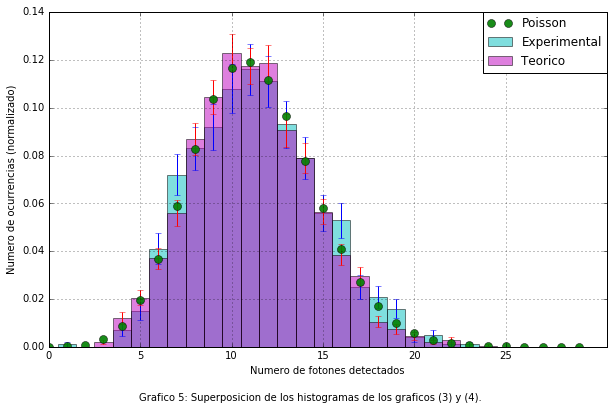

In [60]:
fig = plt.figure(figsize=(10,6))
plt.bar(binsd[:-1], numerod, width = np.diff(binsd), yerr = errord, ecolor="b", color='c', alpha=0.5, label = 'Experimental')
plt.bar(binse[:-1], numeroe, width = np.diff(binse), yerr = errore, ecolor="r", color='m', alpha=0.5, label = 'Teorico')
plt.plot(puntosd,poisson.pmf(puntosd, 15*0.75), 'go', ms=8, label='Poisson', alpha=0.9)
plt.legend(loc=1, borderaxespad=0.)
plt.xlim([0,30.5])
plt.xticks(range(0,30,5))
plt.xlabel('Numero de fotones detectados')
plt.ylabel('Numero de ocurrencias (normalizado)')
plt.figtext(.25, .0001, 'Grafico 5: Superposicion de los histogramas de los graficos (3) y (4).')
plt.grid()
plt.show()

Se oberva que ambos histogramas efectivamente corresponden a la misma ditribución, composición de una binomial con $\epsilon = 0.75$ con una poissoniana con $\mu=15$, es decir una distribución poissoniana de contante $15 \times 0.75$. En sentido estadítsico, se obtuvo el mismo resultado en ambos histogramas, dado que la diferencia entre ellos es del orden del error de cada bin (un orden de magnitud menor que la altura de ese bin). 

# f)

El número de entradas en un bin de un histograma es una variable aleatoria con distribución binomial, ya que representa cuántos fotones "cayeron" en un determinado bin (con N fijo). Si la cantidad de bines tiende a infinito y la probabilidad de caer en un determinado bin tiende a cero, estamos en el límite de Poisson.   
    
Pero el número de entradas por bin no es independiente del resto, porque todos tienen que sumar la cantidad total de fotones, entonces el número de entradas por bin es una variable aleatoria multinomial.   
   
En general vamos a tomar el número de entradas en un bin como una variable aleatoria con ditribución poisoniana porque:   
a) Estamos en el límite de la binomial con N fijo (se decir, hay muchos bines)   
b) N no es fijo, sino que tiene una distribución de Poisson, entonces el número de entradas por bin tiene una ditribución que es composición de una multinomial con una poissoniana